# Import libs

In [3]:
# Import some stuff
import os
from dotenv import load_dotenv
from pathlib import Path
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
import ast
import datetime
import seaborn as sns
import json
import numpy as np

import matplotlib as mpl

from datetime import datetime
from dateutil.parser import parse
import pandas as pd


from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

ImportError: DLL load failed: The specified module could not be found.

In [ ]:
# specifies number of rows to show
pd.set_option('display.max_rows', 300) 

# specifies default number format to 4 decimal places
pd.options.display.float_format = '{:40,.4f}'.format 

# specifies that graphs should use ggplot styling
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = 50, 30

%matplotlib inline


In [1]:
# load .env variable
base_dir = 'D:\Documentos\GitHub\CityBlender'
dotenv_file = os.path.join(base_dir, '.env')


if os.path.isfile(dotenv_file):
    load_dotenv(dotenv_file, verbose=True)
    
db_uri = os.getenv('DB_URI')

NameError: name 'os' is not defined

In [248]:
# create a new MongoDB Client
db_client = MongoClient(str(db_uri))

db_client.london.command("serverStatus")


{'$clusterTime': {'clusterTime': Timestamp(1526401960, 5),
  'signature': {'hash': b'q\x8a=\x0b\x16+\xd6\xba\xd9|\x03e\xca\xde%mS\x1b\xbf#',
   'keyId': 6547659444975566849}},
 'asserts': {'msg': 0, 'regular': 0, 'rollovers': 0, 'user': 0, 'warning': 0},
 'connections': {'available': 89, 'current': 11, 'totalCreated': 360},
 'extra_info': {'note': 'fields vary by platform', 'page_faults': 0},
 'host': 'fuinki-master-cluster-shard-00-00-jlcmm.mongodb.net:27017',
 'localTime': datetime.datetime(2018, 5, 15, 16, 32, 40, 506000),
 'mem': {'bits': 64,
  'mapped': 0,
  'mappedWithJournal': 0,
  'resident': 0,
  'supported': True,
  'virtual': 0},
 'metrics': {'atlas': {'bytesInWrites': 0,
   'connectionPool': {'totalCreated': 1393}}},
 'network': {'bytesIn': 45936557, 'bytesOut': 125101190, 'numRequests': 55119},
 'ok': 1.0,
 'opcounters': {'command': 50188,
  'delete': 0,
  'getmore': 9,
  'insert': 4255,
  'query': 488,
  'update': 0},
 'opcountersRepl': {'command': 0,
  'delete': 0,
  'ge

In [249]:
# choose a database to connect to (.london)
db_london = db_client.london

# choose a collection
db_london_events = db_london['events']
db_london_artist = db_london['artists']

In [250]:
# lookup all the documents in a collection
db_london_events.find()

## EOD

In [251]:
events = pd.DataFrame(list(db_london_events.find({})))

In [252]:
events.columns

Index(['_id', 'artists', 'date', 'datetime', 'datetime_source', 'foursquare',
       'id', 'lastfm', 'location', 'name', 'popularity', 'spotify', 'time',
       'type', 'url', 'venue'],
      dtype='object')

### For instance in the first row there are 3 events

In [253]:
# Put this in the date fomrat
events['date'] = [(datetime.strptime(events['date'][x], '%Y-%m-%d')) for x in range(len(events['date']))]

# Convert the dates into day name
events['date_name'] = [(events['date'][x].strftime("%A")) for x in range(len(events['date']))]

# Lat & Long
events['lat'] = [(events['location'][x]['lat']) for x in range(len(events['location']))]
events['lng'] = [(events['location'][x]['lng']) for x in range(len(events['location']))]

## Spotify

In [254]:
type(events['spotify'][0])

dict

In [258]:
for key in events['spotify'][0]:
  print(key)

genres
popularity
popularity_median
popularity_min
popularity_max
popularity_pvariance
followers
followers_sum
danceability
danceability_median
danceability_min
danceability_max
danceability_pvariance
energy
energy_median
energy_min
energy_max
enery_pvariance
key
key_mode
key_min
key_max
loudness
loudness_median
loudness_min
loudness_max
loudness_pvariance
mode
mode_mode
speechiness
speechiness_median
speechines_min
speechines_max
speechines_pvariance
acousticness
acousticness_median
acousticness_min
acousticness_max
acousticness_pvariance
instrumentalness
instrumentalness_median
instrumentalness_min
instrumentalness_max
instrumentalness_pvariance
liveness
liveness_median
liveness_min
liveness_max
liveness_pvariance
valence
valence_median
valence_min
valence_max
valence_pvariance
tempo
tempo_median
tempo_min
tempo_max
tempo_pvariance
duration_ms
duration_ms_mean
duration_ms_min
duration_ms_max
duration_ms_pvariance
time_signature
time_signature_mode


In [306]:
def plot_a_scatter(db = events, x = 'tempo_median', y = 'acousticness_median'):

    for_plot = pd.DataFrame()
    list_of_x = []
    list_of_y = []
    
    for i in range(len(db['spotify'])):
        if type(db['spotify'][i]) != float:
            list_of_x.extend(db['spotify'][i][x])

    for i in range(len(db['spotify'])):
        if type(db['spotify'][i]) != float:
            list_of_y.extend(db['spotify'][i][y])
            
    for_plot[x] = list_of_x
    for_plot[y] = list_of_y
    
    plt.scatter(for_plot[x], for_plot[y])

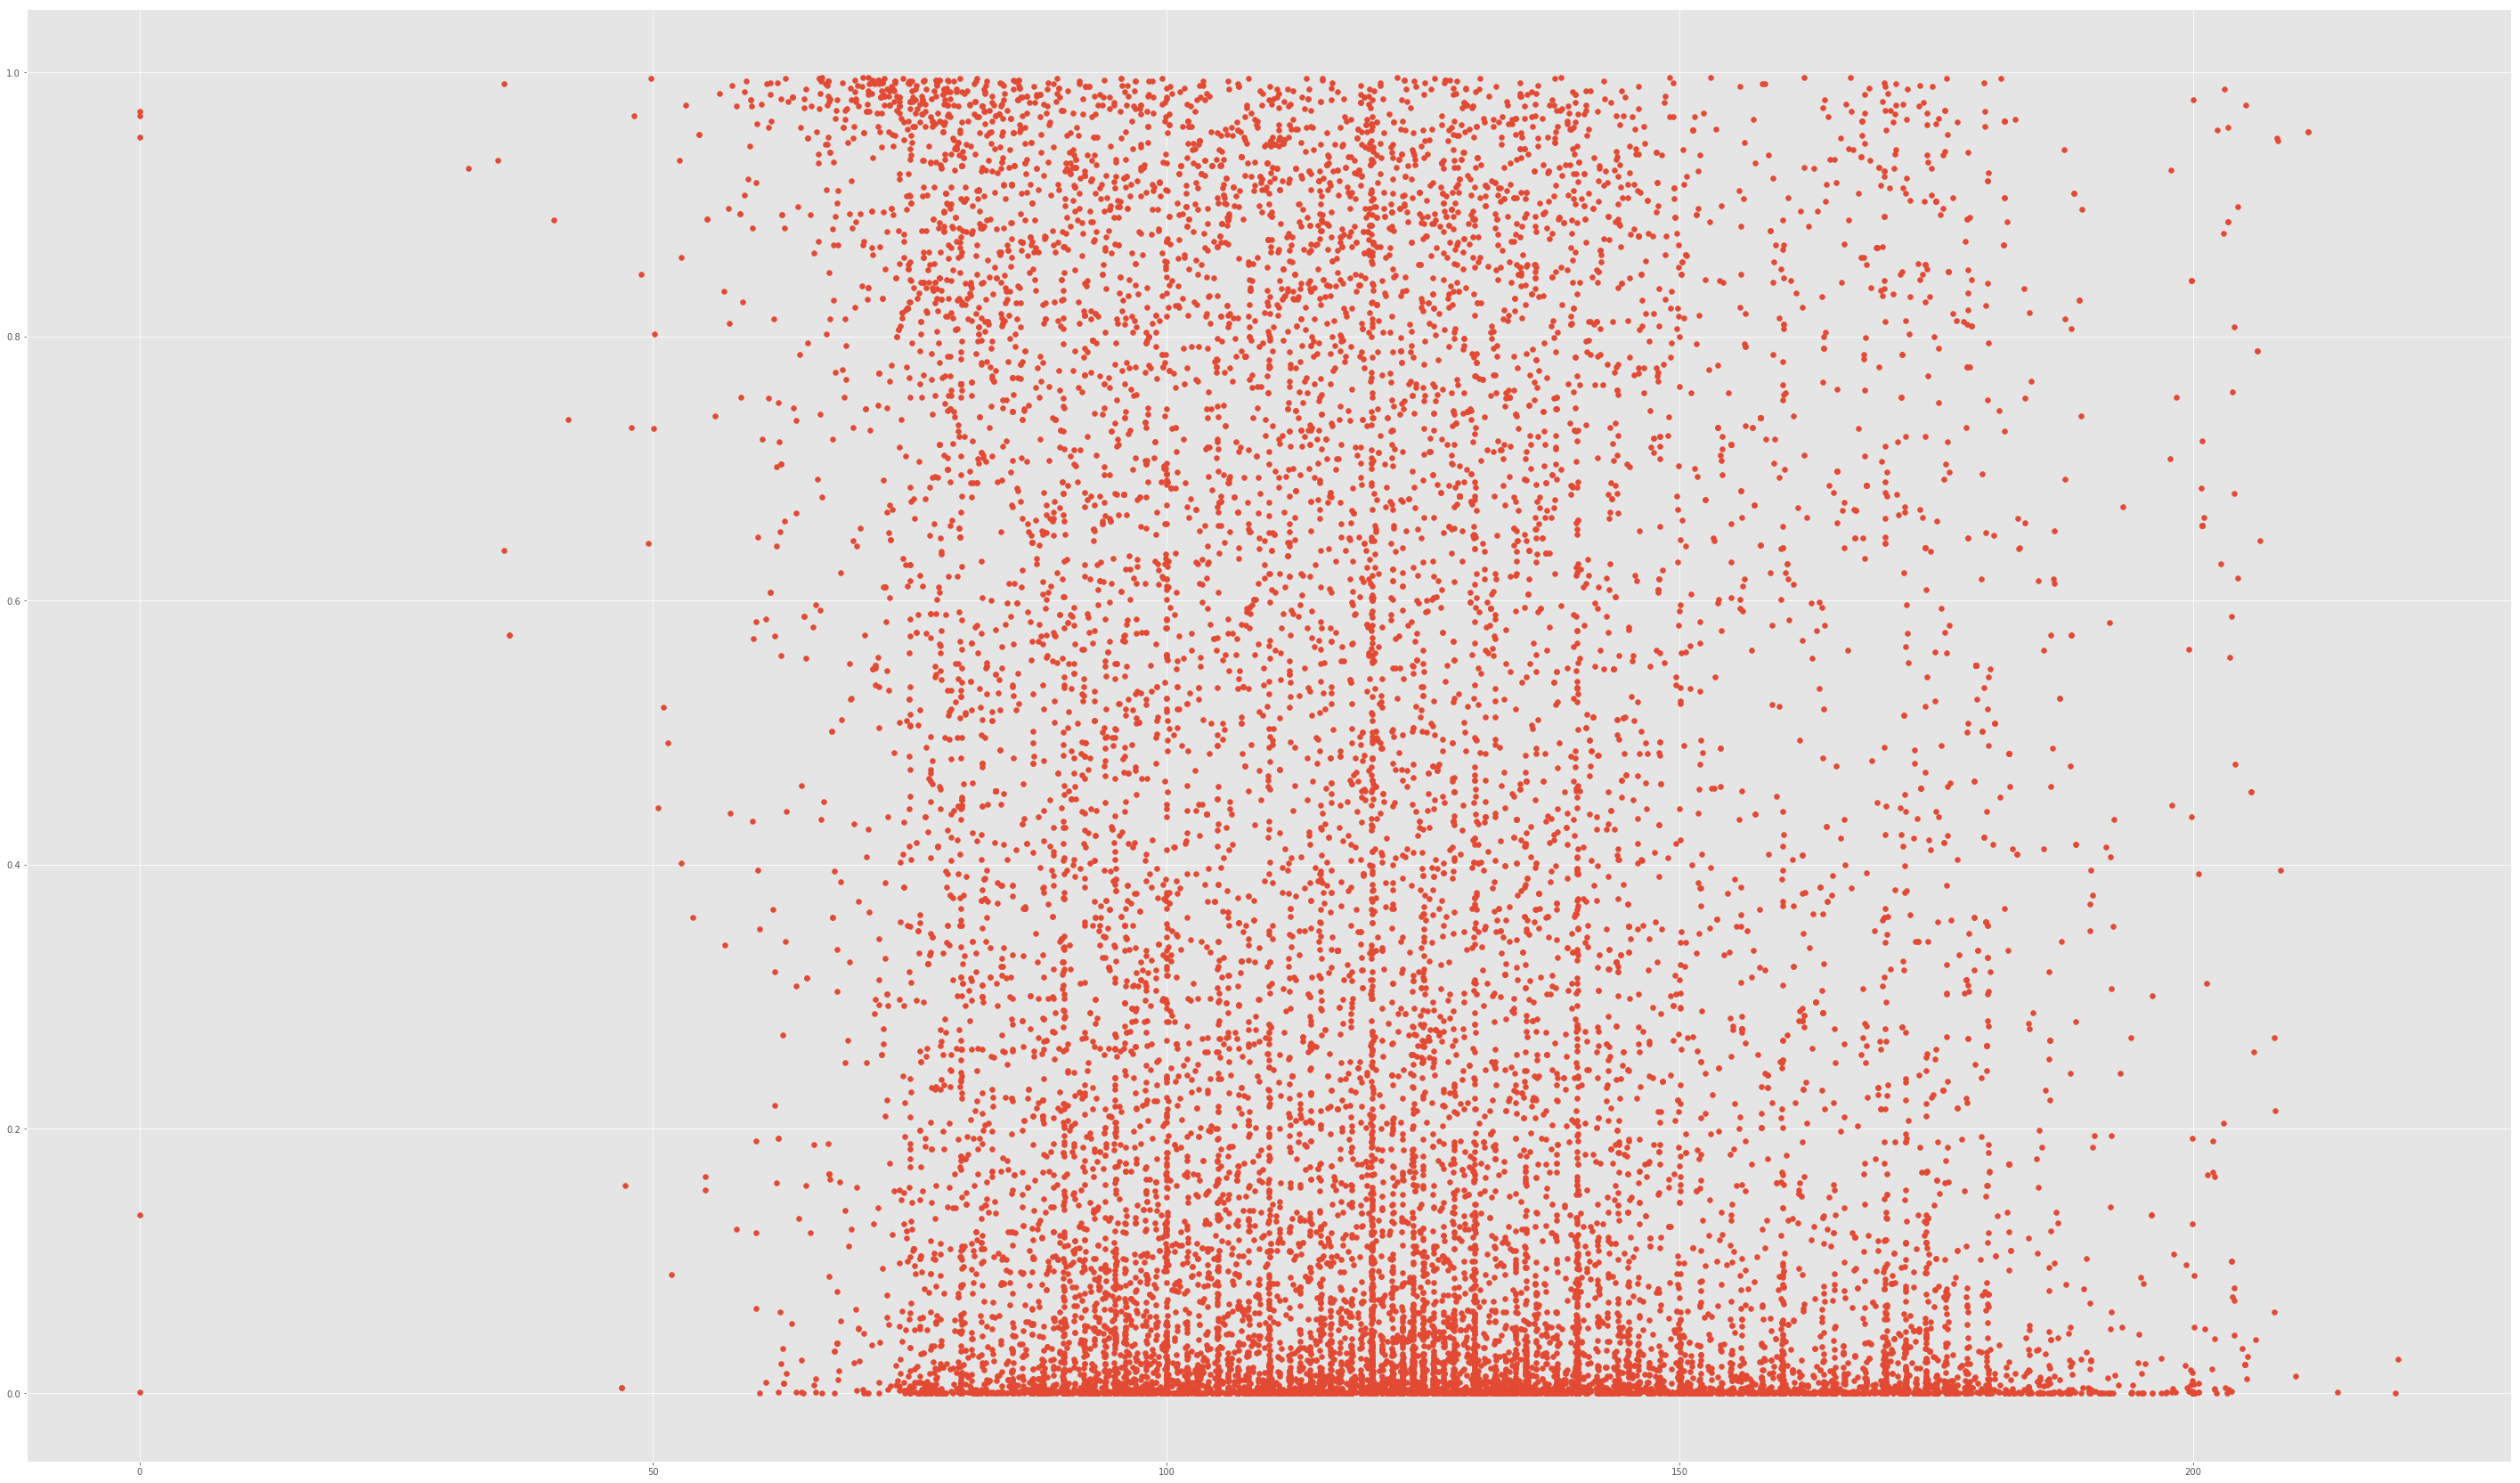

In [309]:
plot_a_scatter(db = events, x = 'tempo', y = 'acousticness')

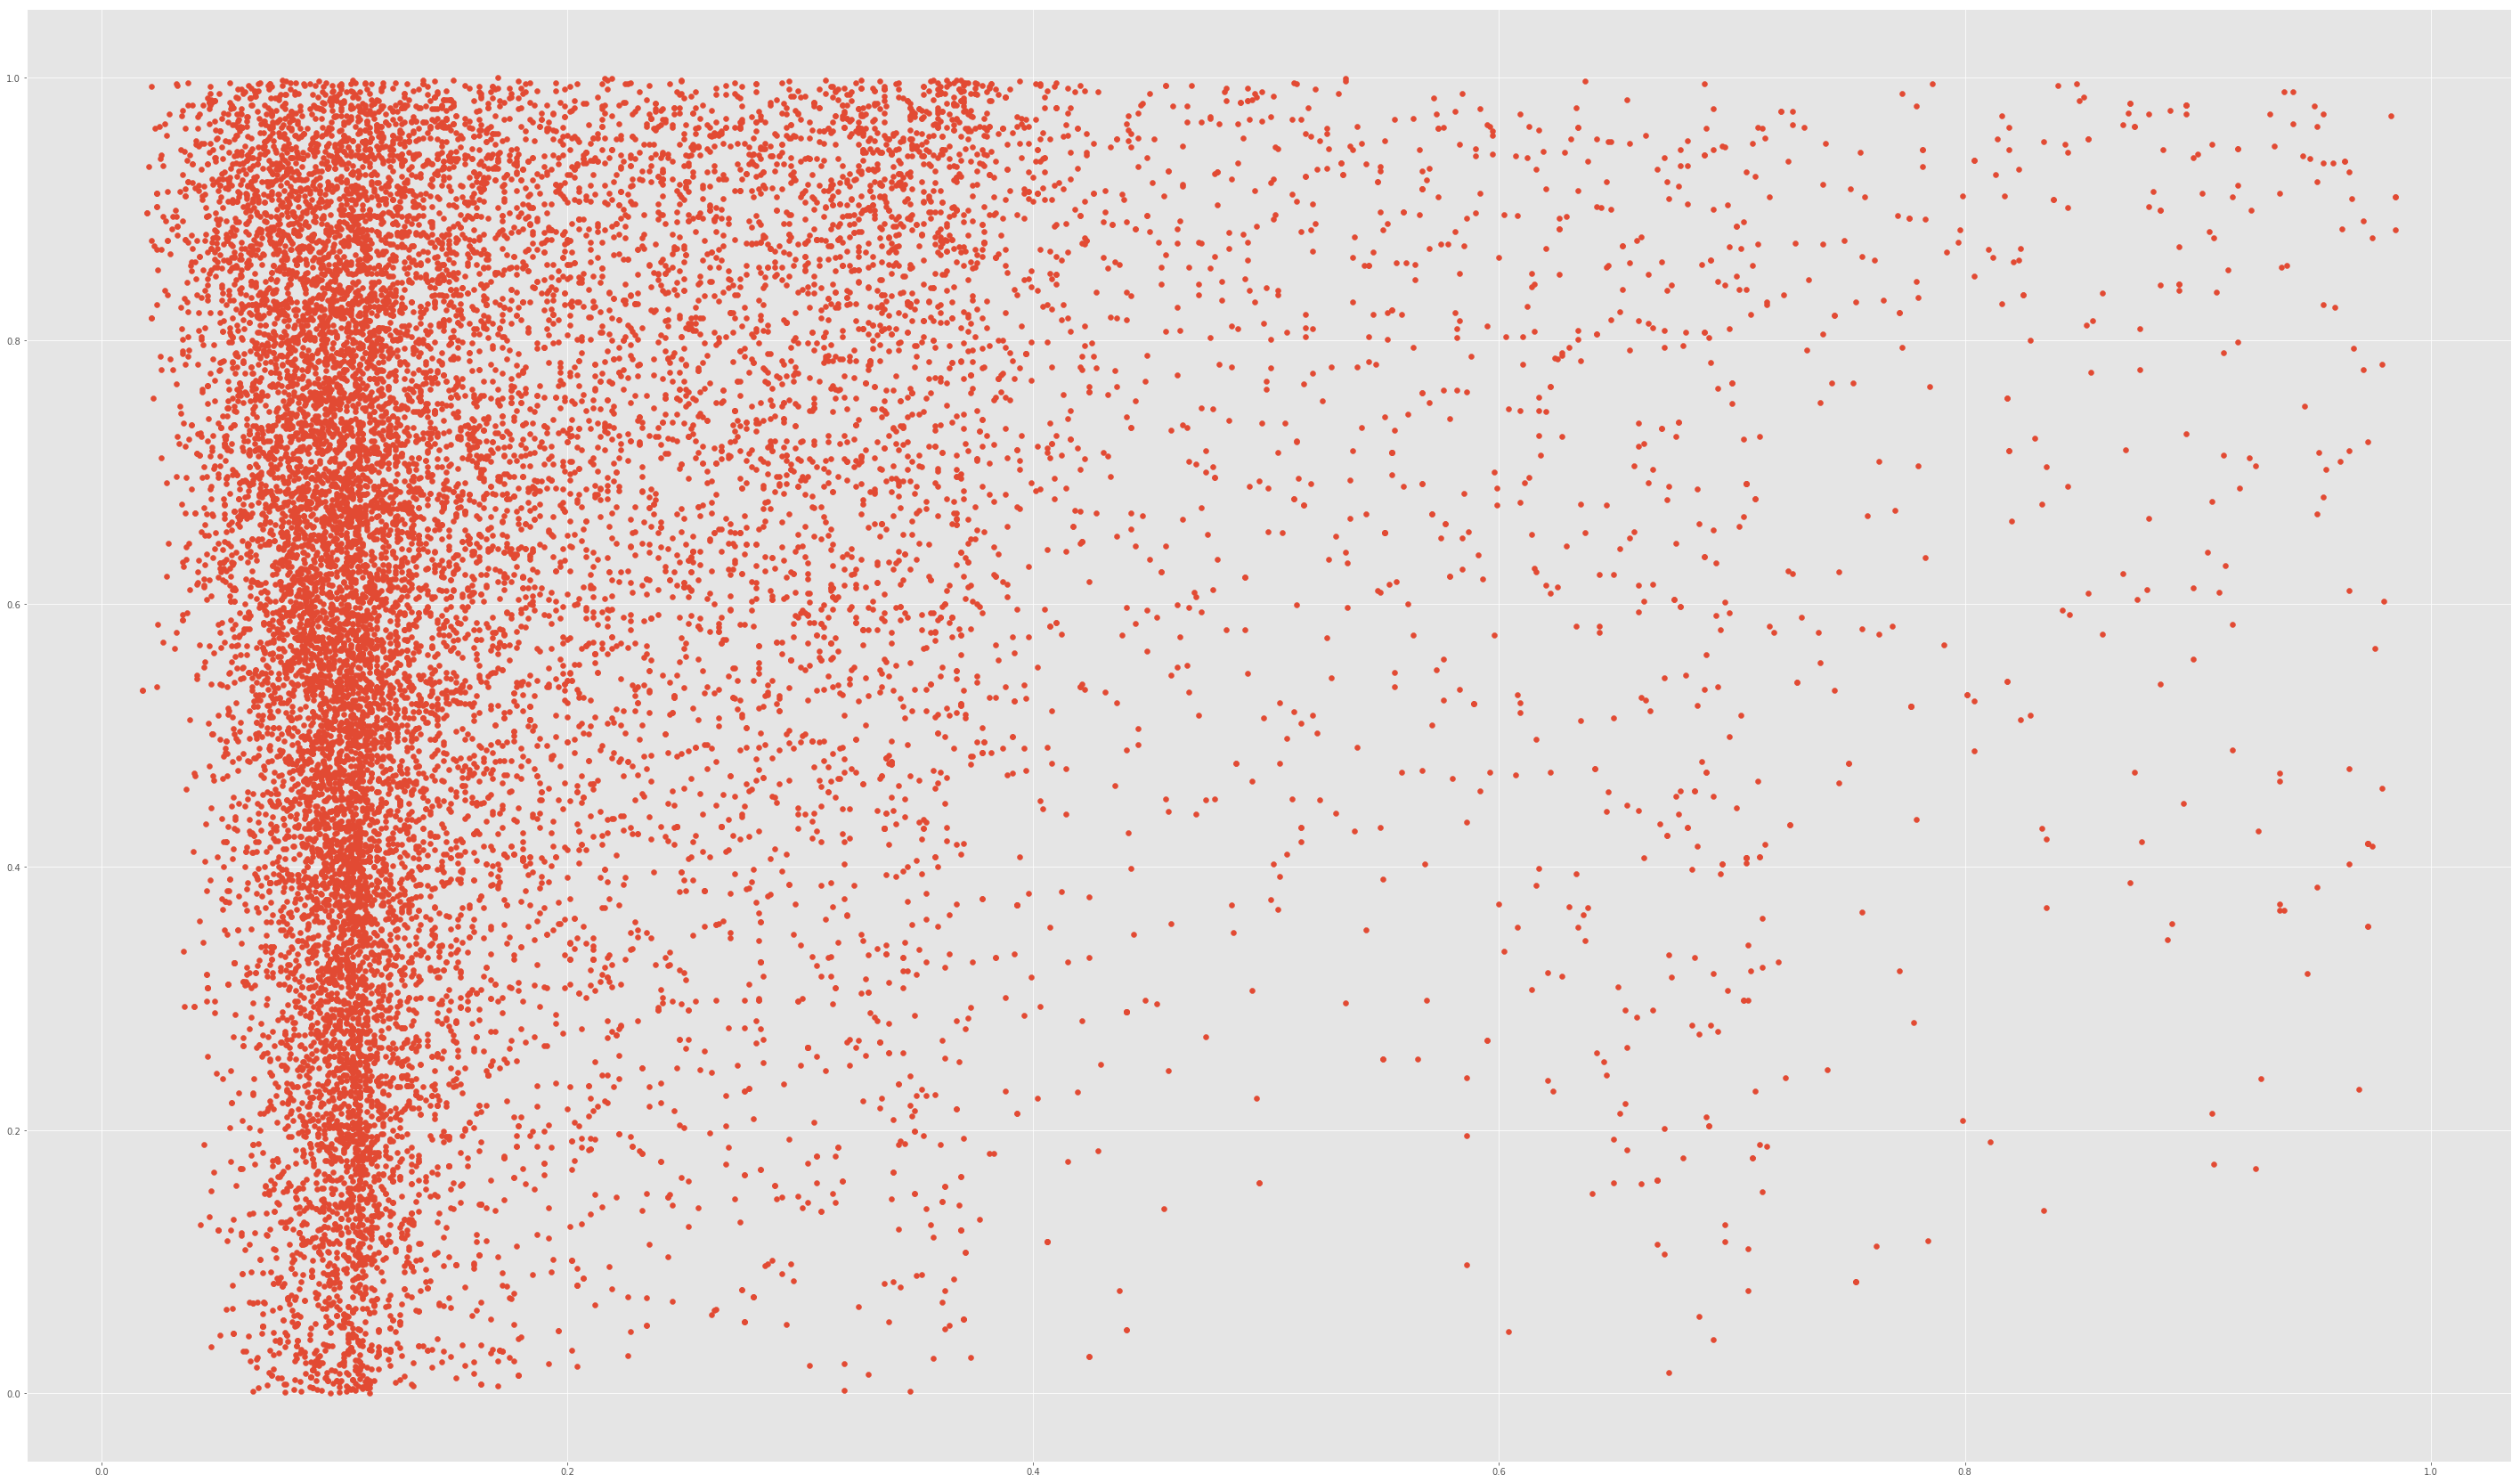

In [300]:
plot_a_scatter(db = events, x = 'liveness', y = 'energy')

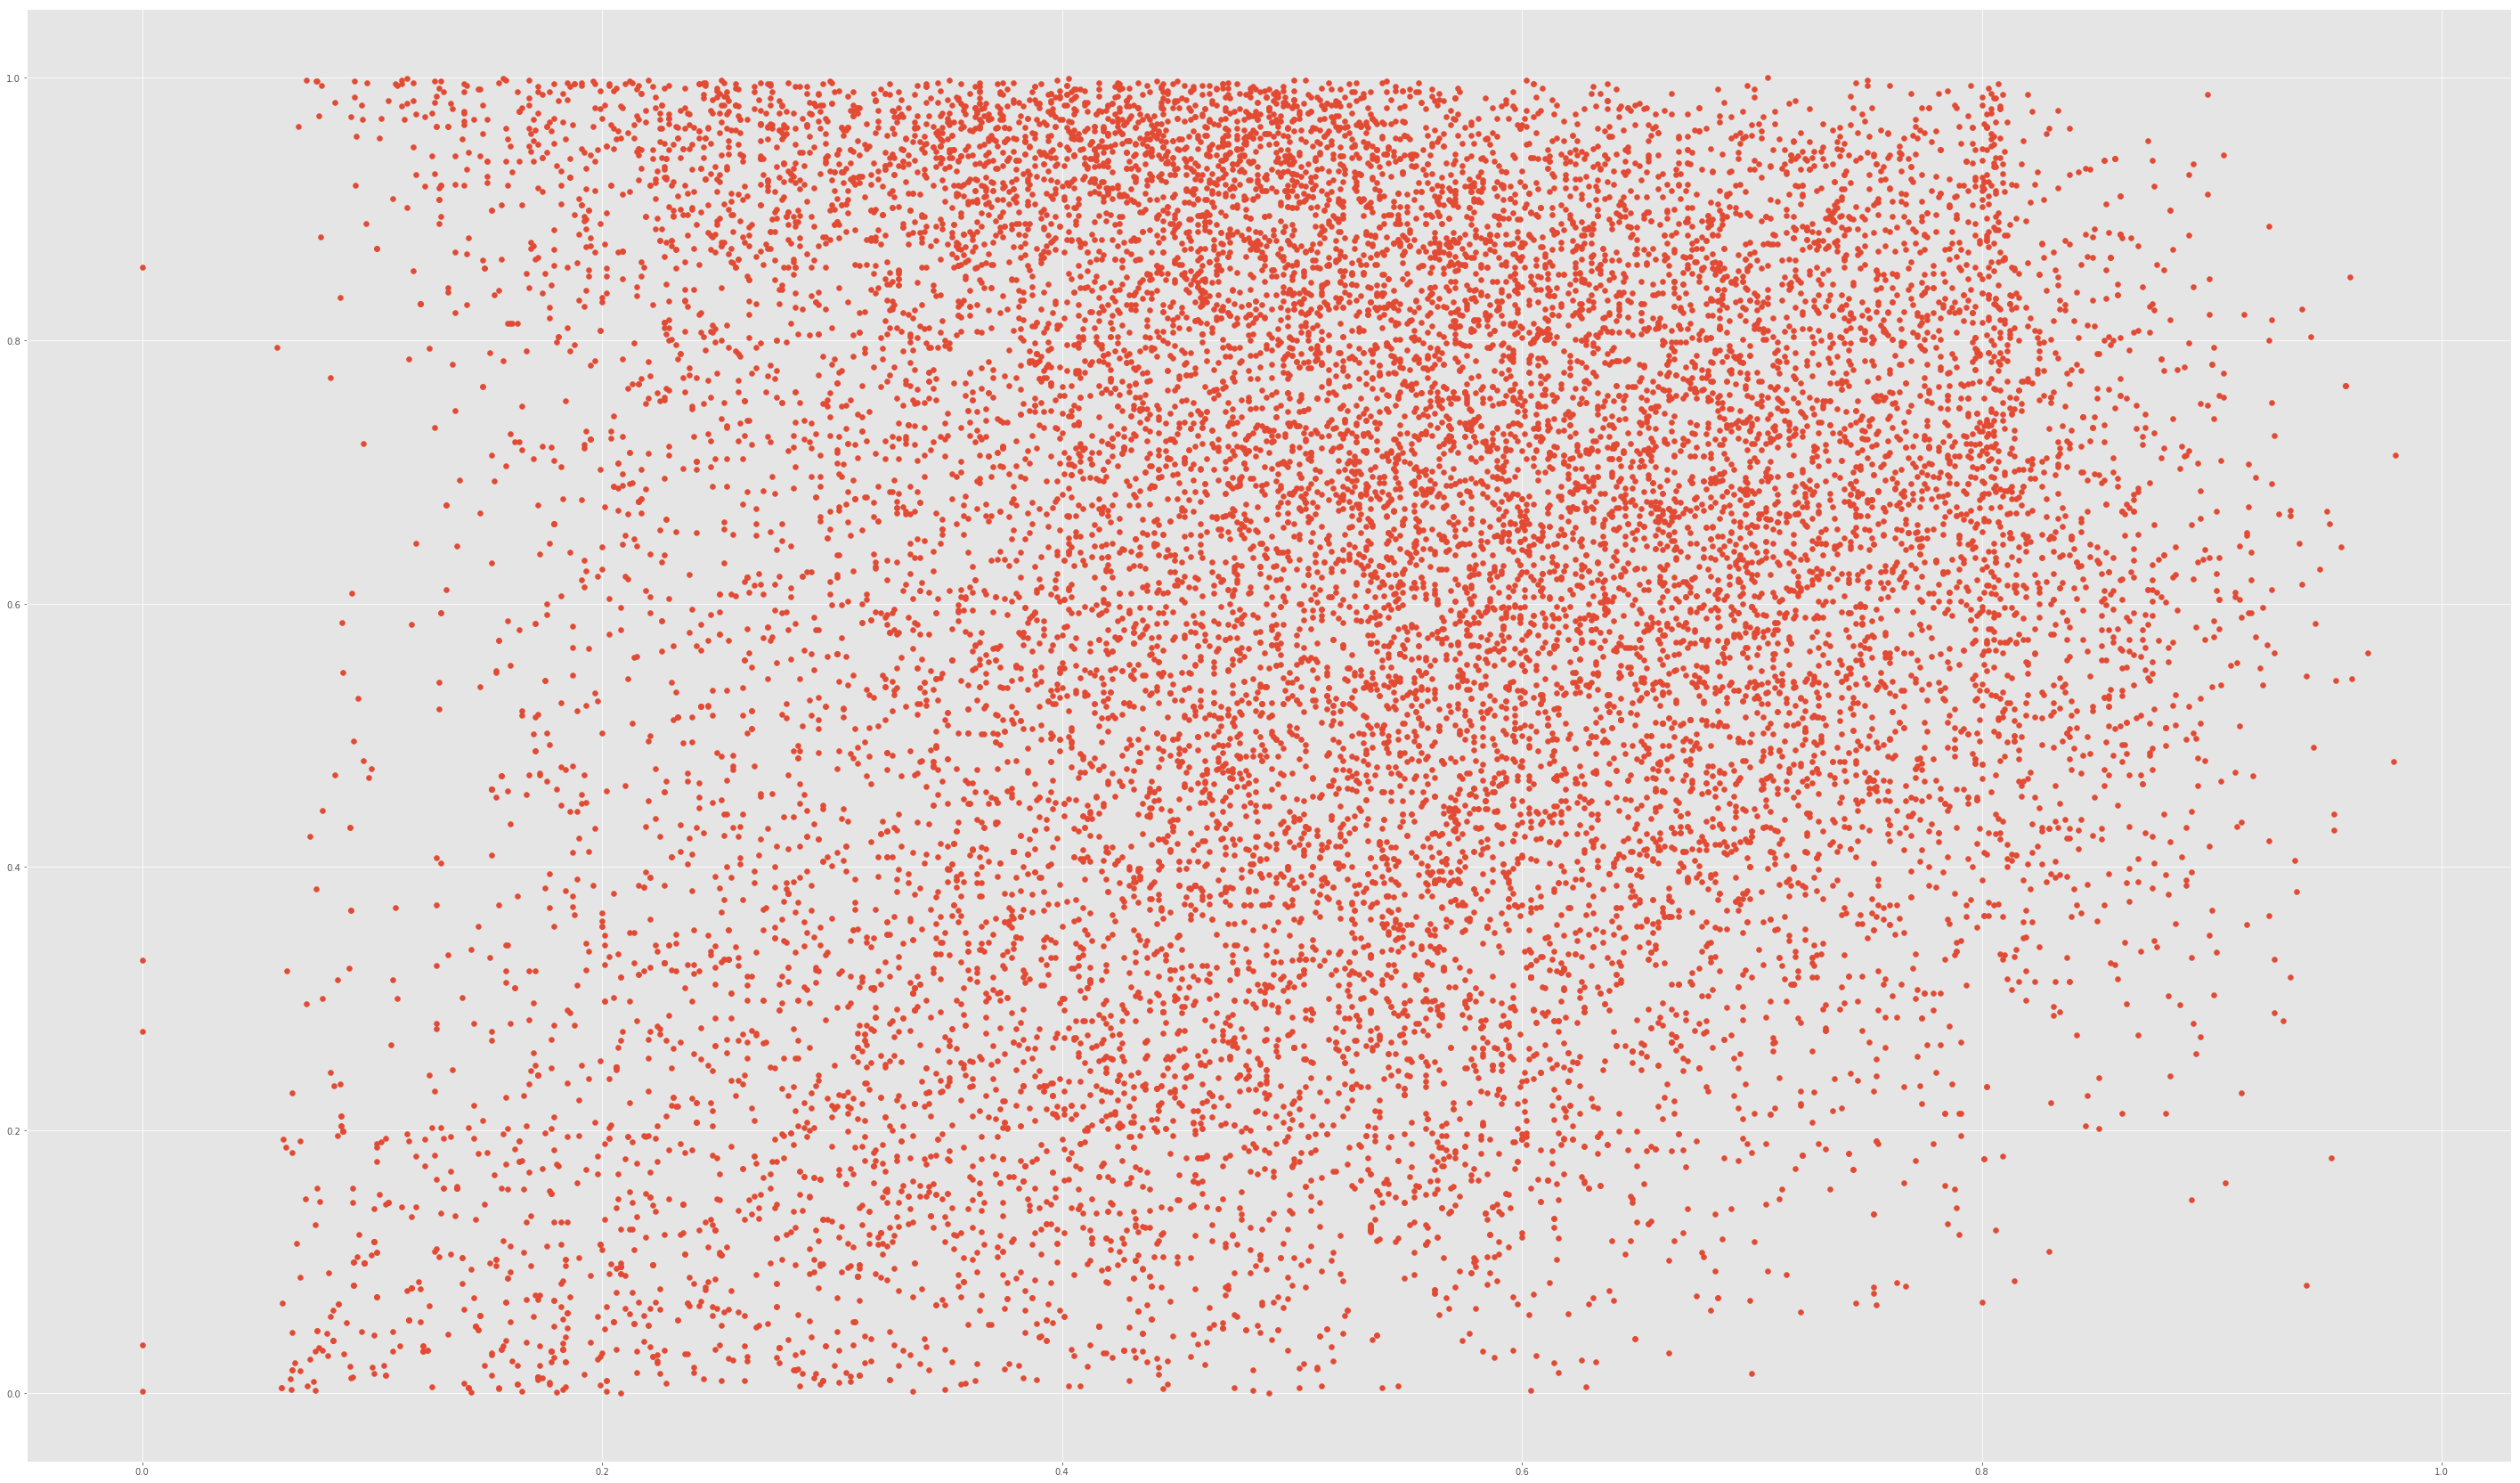

In [301]:
plot_a_scatter(db = events, x = 'danceability', y = 'energy')

## Genere - What to do with missing values

In [137]:
list_of_generes = []

for i in range(len(events['spotify'])):
    if type(events['spotify'][i]) != float:
        list_of_generes.extend(events['spotify'][i]['genres'])
    


In [224]:
events['spotify'][2]['genres']

['bow pop',
 'chamber pop',
 'compositional ambient',
 'focus',
 'icelandic classical',
 'icelandic pop',
 'neoclassical',
 'new tribe']

## Word cloud

In [154]:
len(list_of_generes)

961

In [145]:
data = list_of_generes

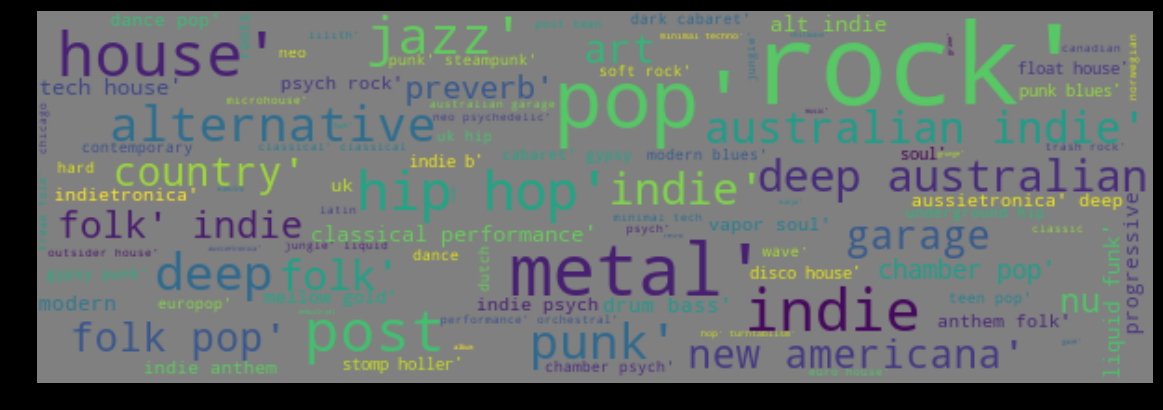

In [183]:
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(25,25)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=1200             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

seed = 320
stopwords = set(STOPWORDS)
data = list_of_generes

wordcloud = WordCloud(width=600, height=200,
                          background_color='grey',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str((data)))



plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

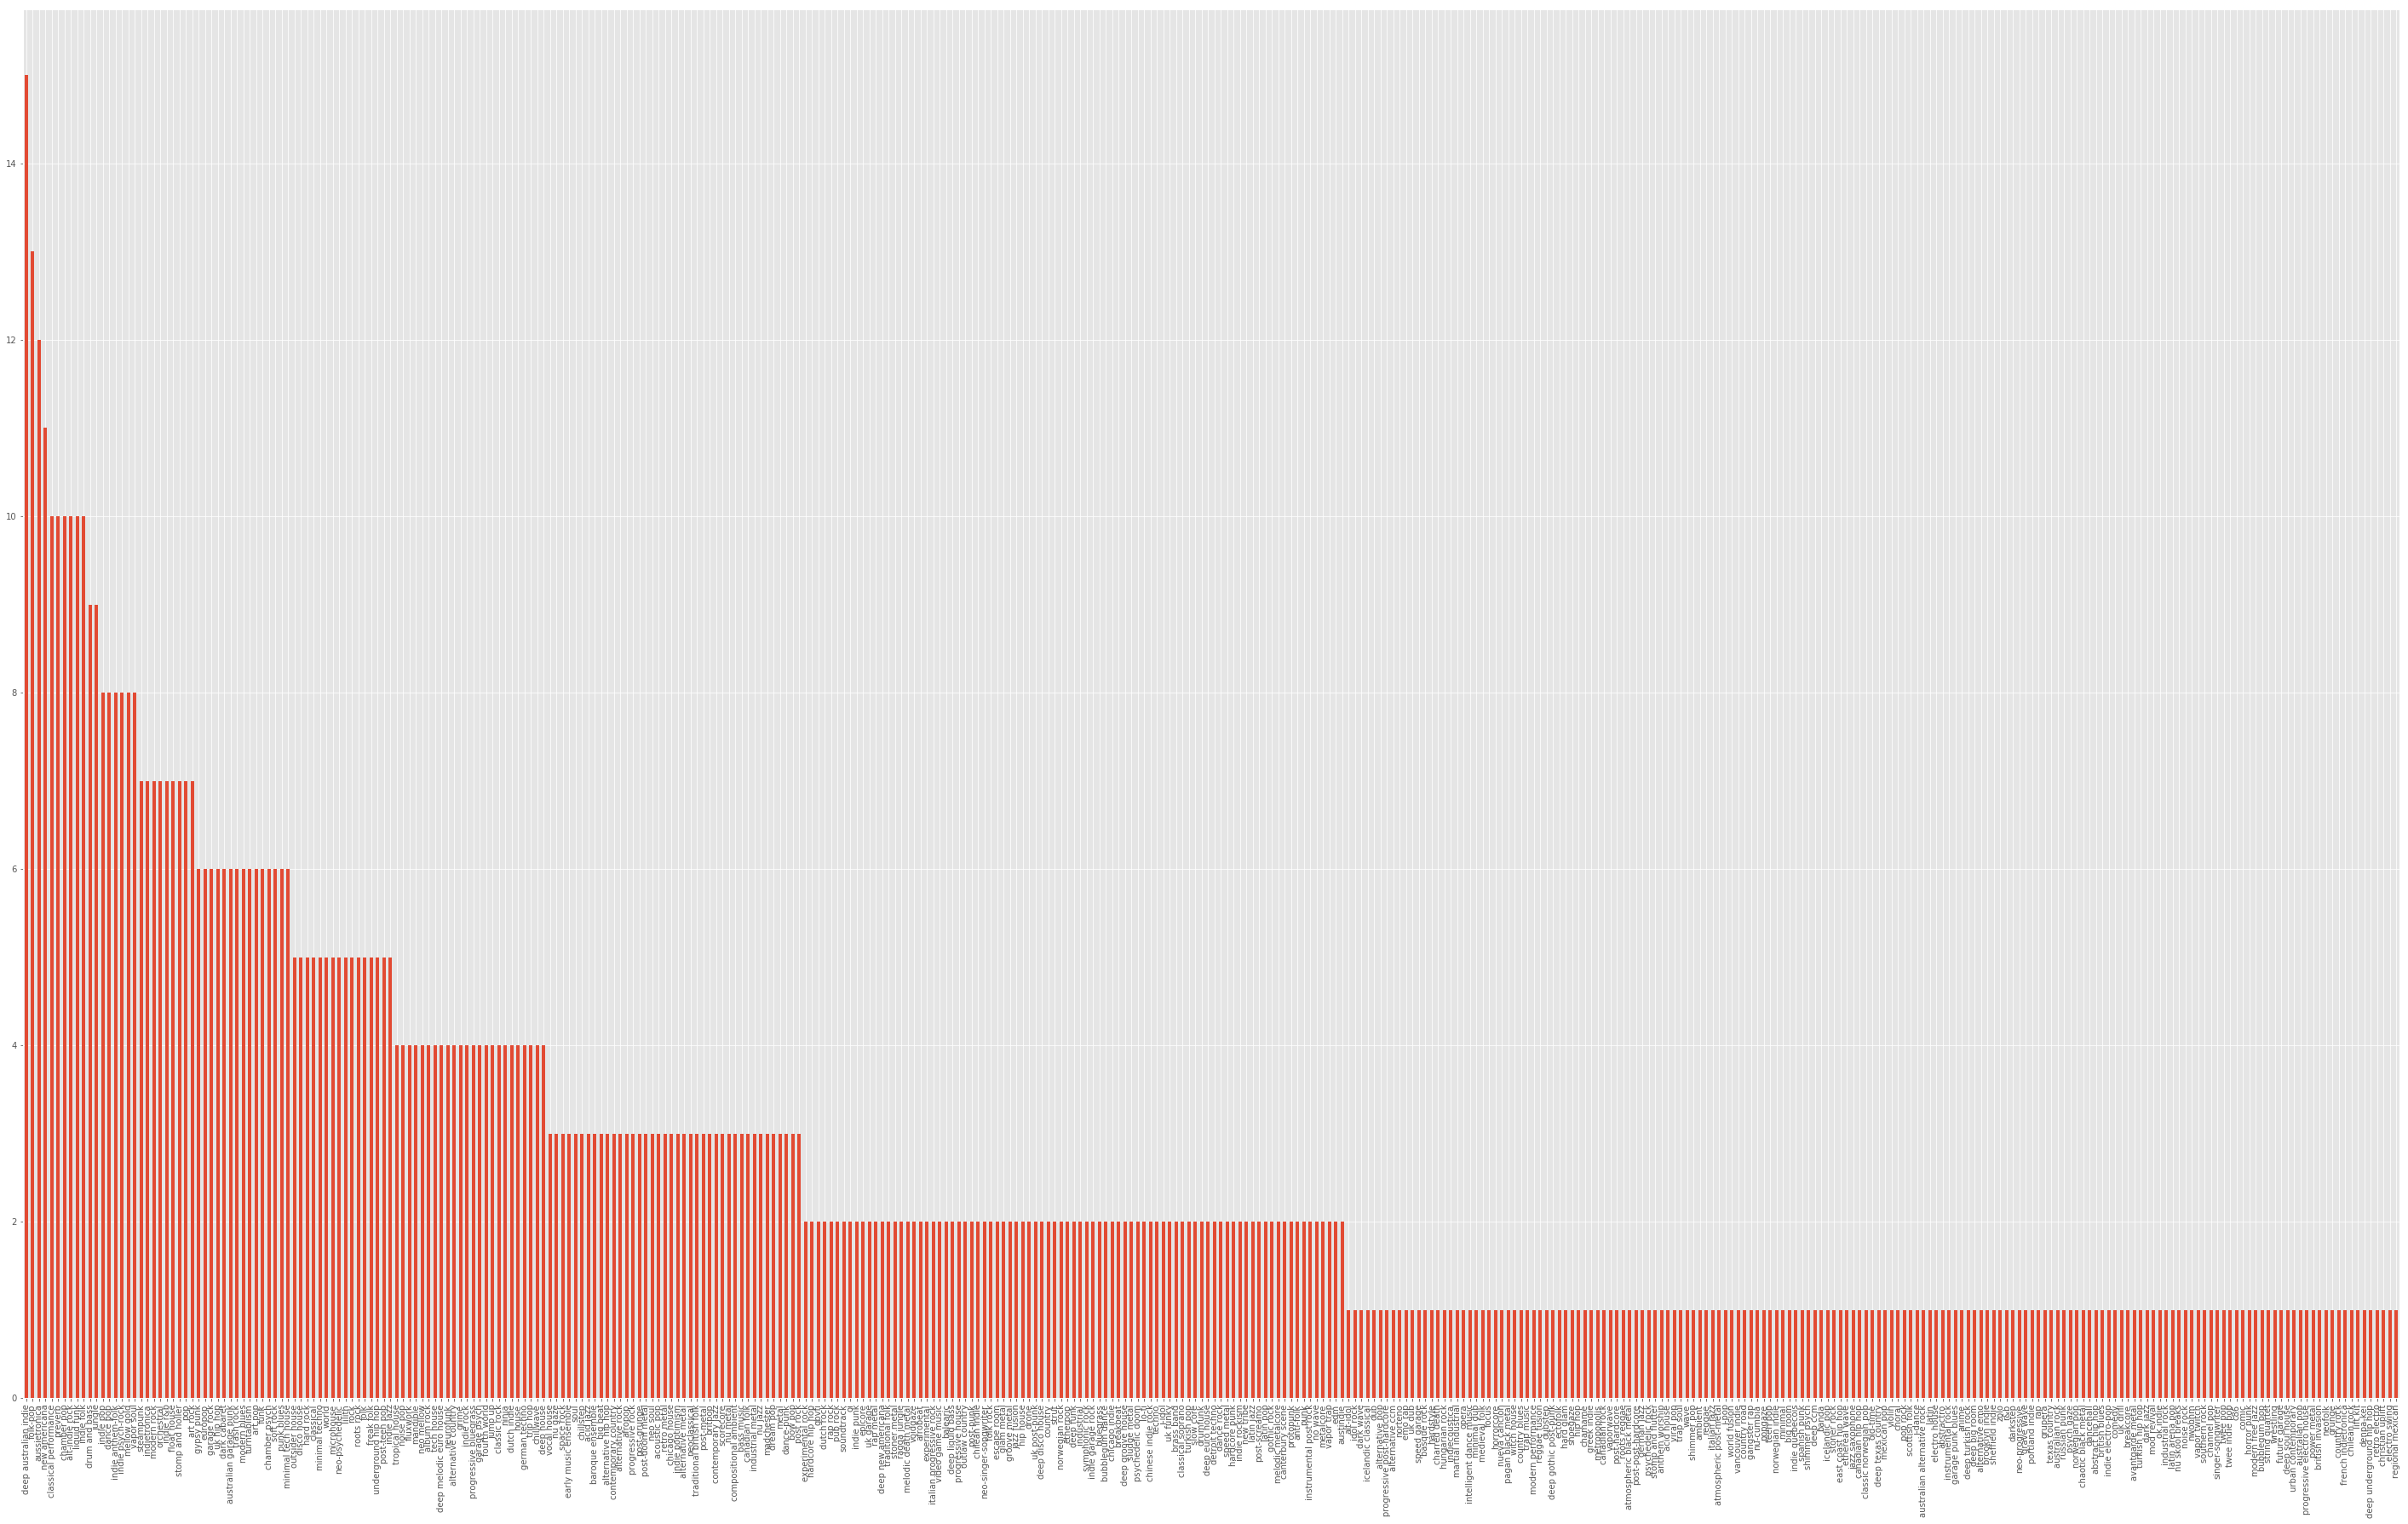

In [204]:
pd.Series(data).value_counts().plot('bar')

## Spotify vars

In [208]:
def plot_distributions(db = events, var = 'acousticness_median'):
    list_of_var = []

    for i in range(len(db['spotify'])):
        if type(db['spotify'][i]) != float:
            list_of_var.append(db['spotify'][i][var])
    
    
    plt.hist(list_of_var)

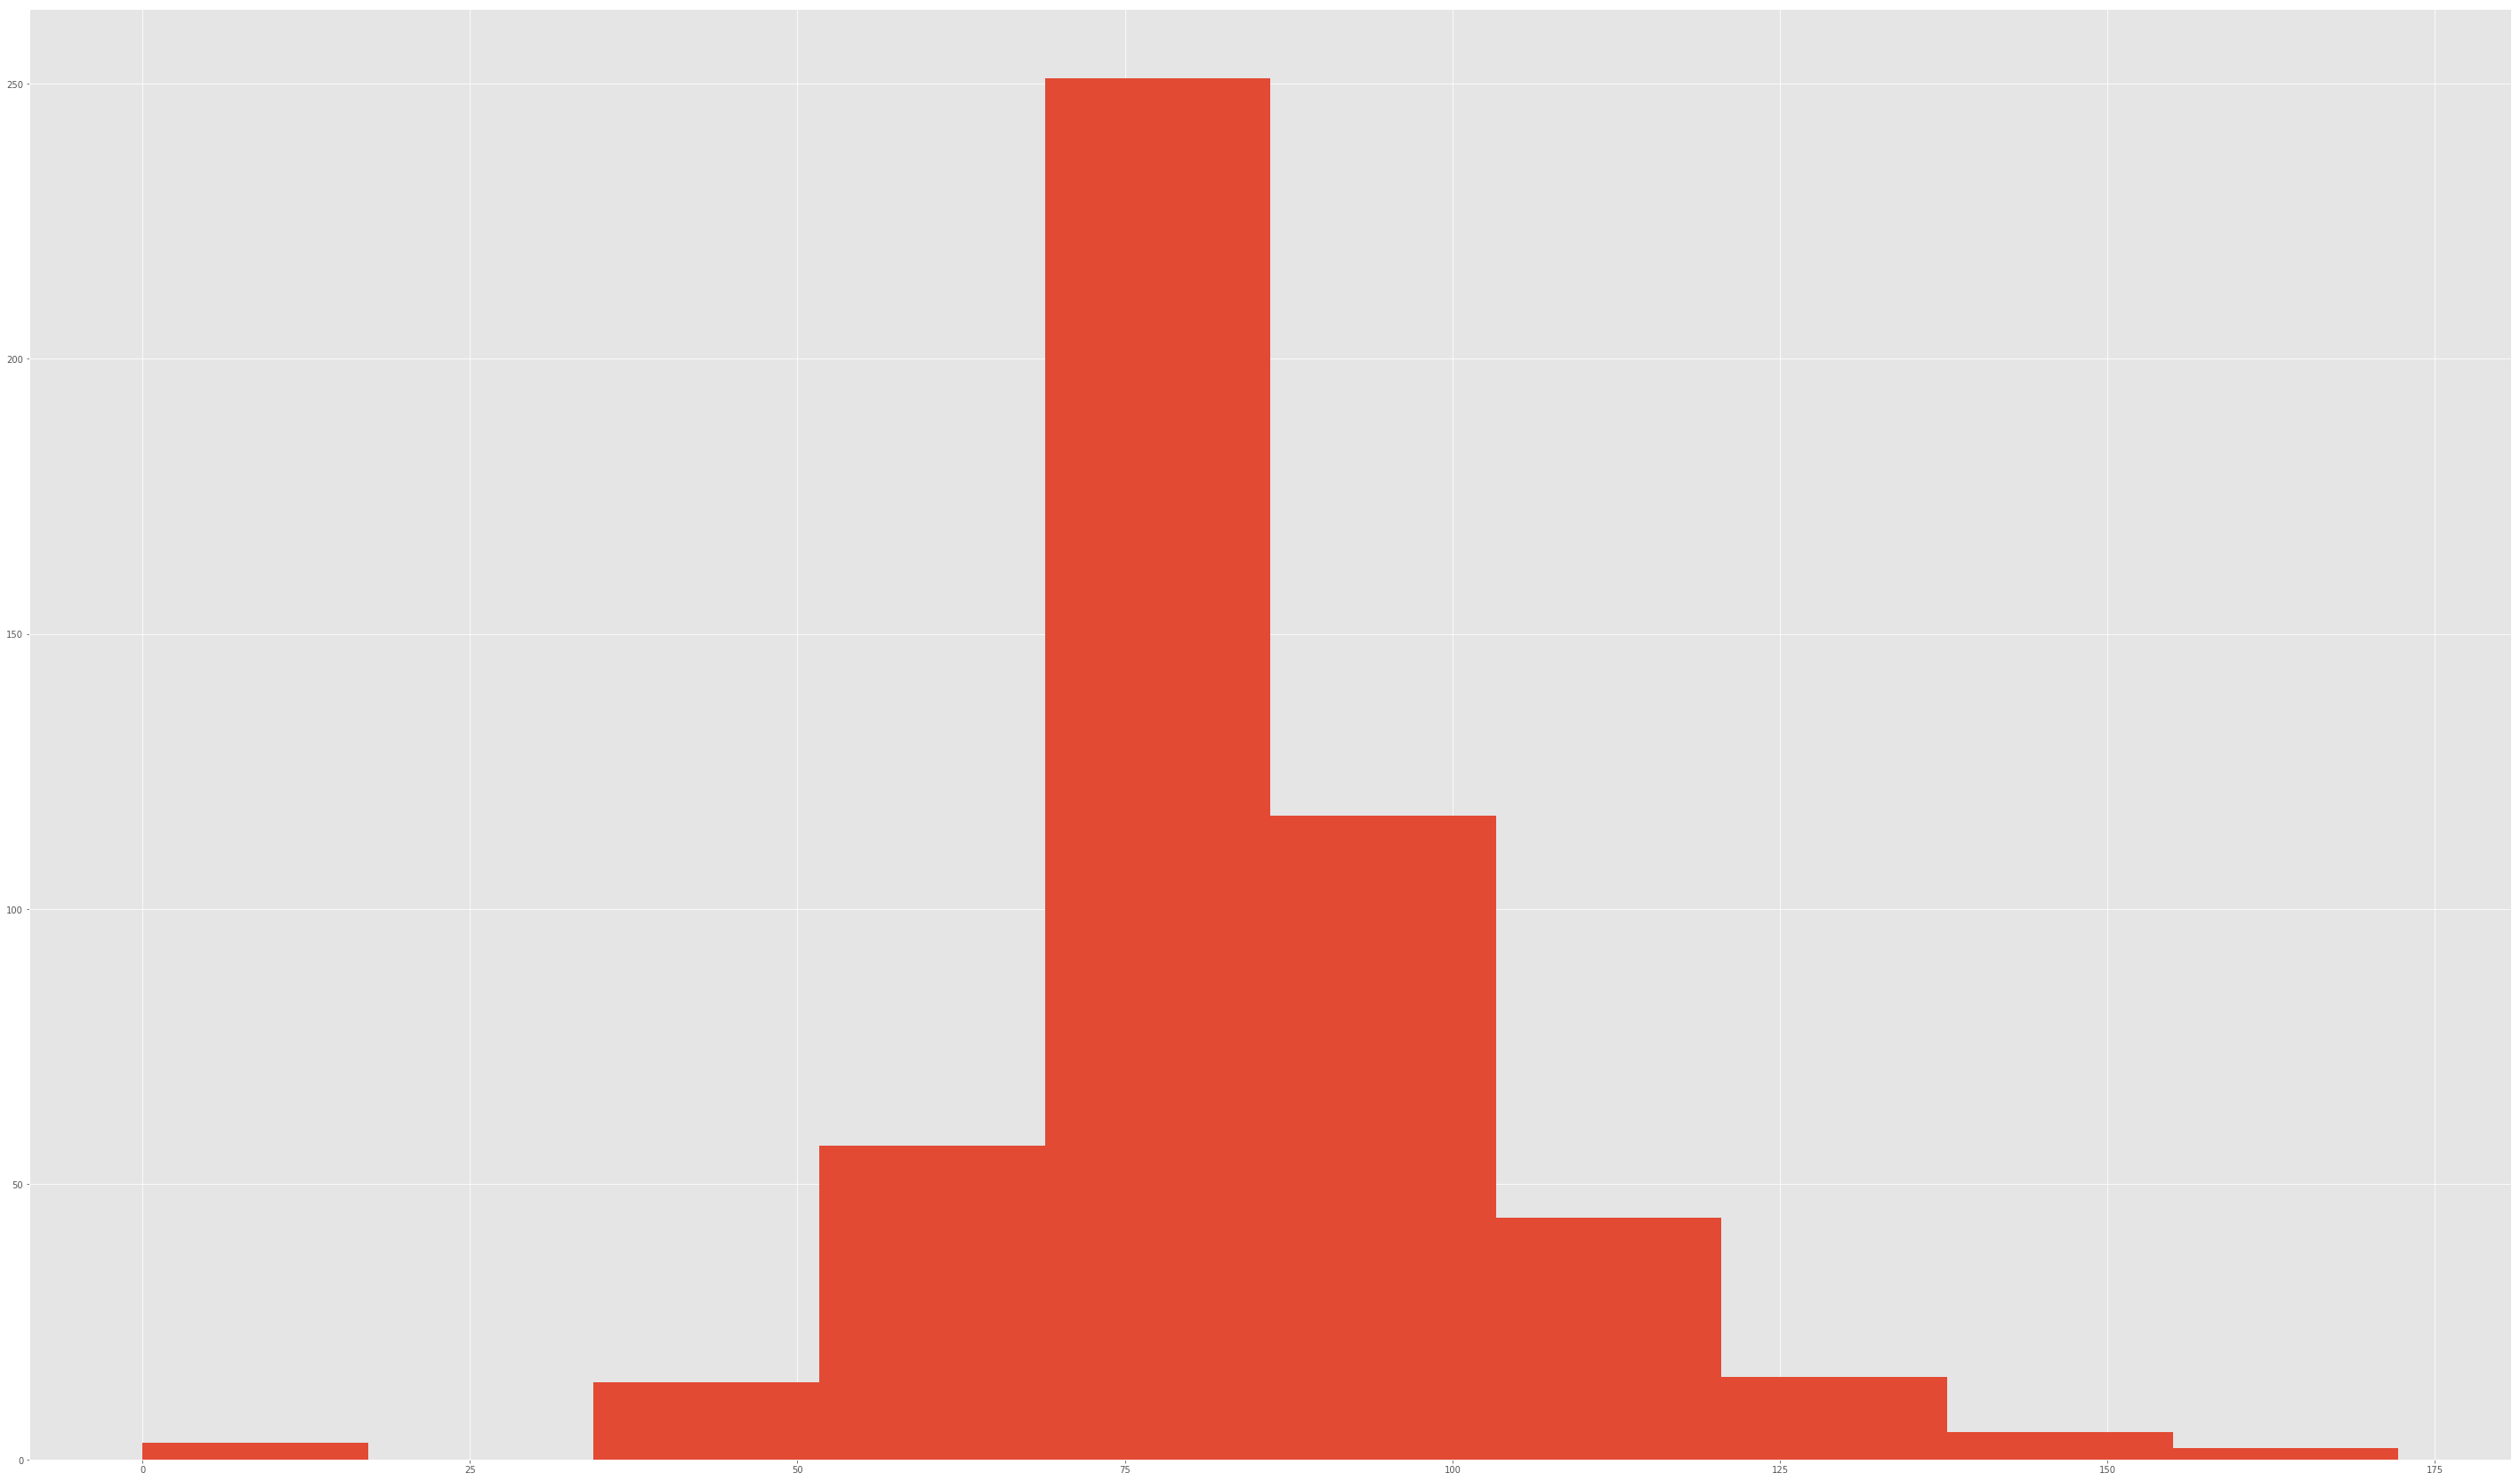

In [218]:
plot_distributions(events, var = 'tempo_min')

In [192]:
list_of_acousticness = []

for i in range(len(events['spotify'])):
    if type(events['spotify'][i]) != float:
        list_of_acousticness.append(events['spotify'][i]['acousticness_median'])
    

(array([210.,  52.,  41.,  38.,  27.,  30.,  29.,  33.,  22.,  26.]),
 array([1.27450000e-05, 9.95114705e-02, 1.99010196e-01, 2.98508921e-01,
        3.98007647e-01, 4.97506372e-01, 5.97005098e-01, 6.96503824e-01,
        7.96002549e-01, 8.95501274e-01, 9.95000000e-01]),
 <a list of 10 Patch objects>)

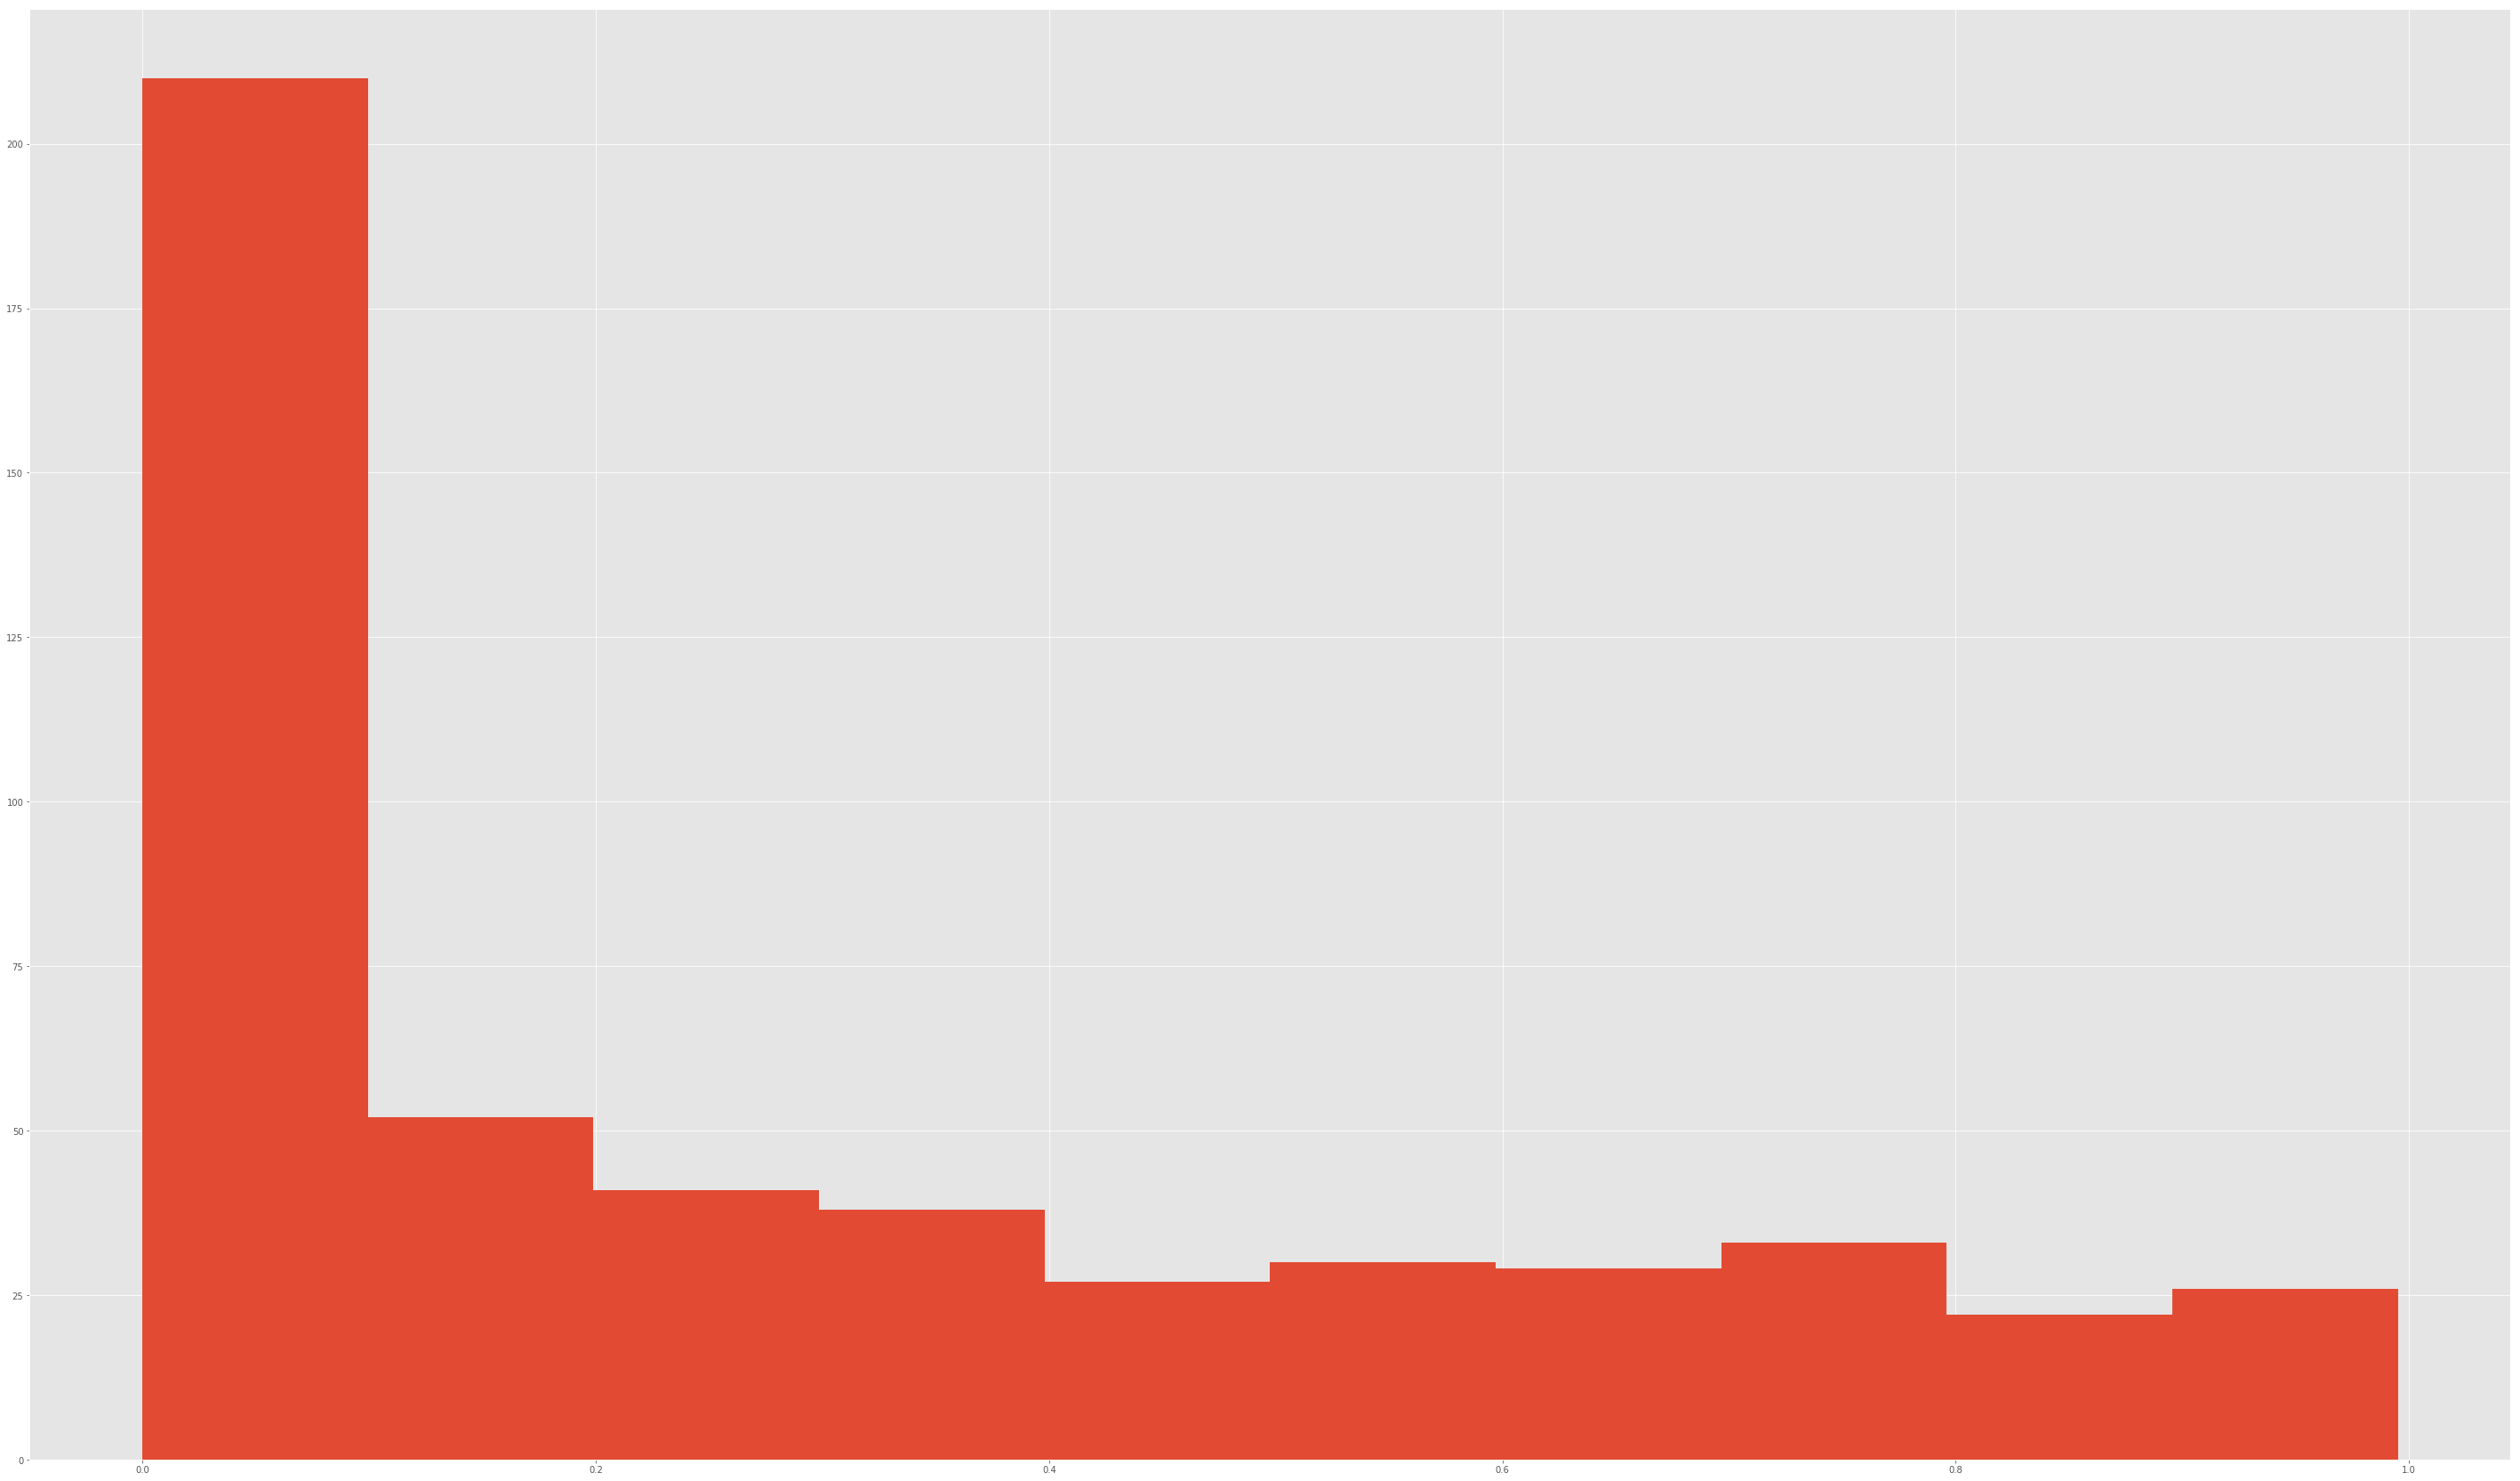

In [213]:
plt.hist(list_of_acousticness)

In [244]:
list_of_tempo = []
list_of_dance =[]

db = events

for i in range(len(db['spotify'])):
        if type(db['spotify'][i]) != float:
            list_of_tempo.append(db['spotify'][i]['energy_median'])
            
for i in range(len(db['spotify'])):
        if type(db['spotify'][i]) != float:
            list_of_dance.append(db['spotify'][i]['popularity_median'])            

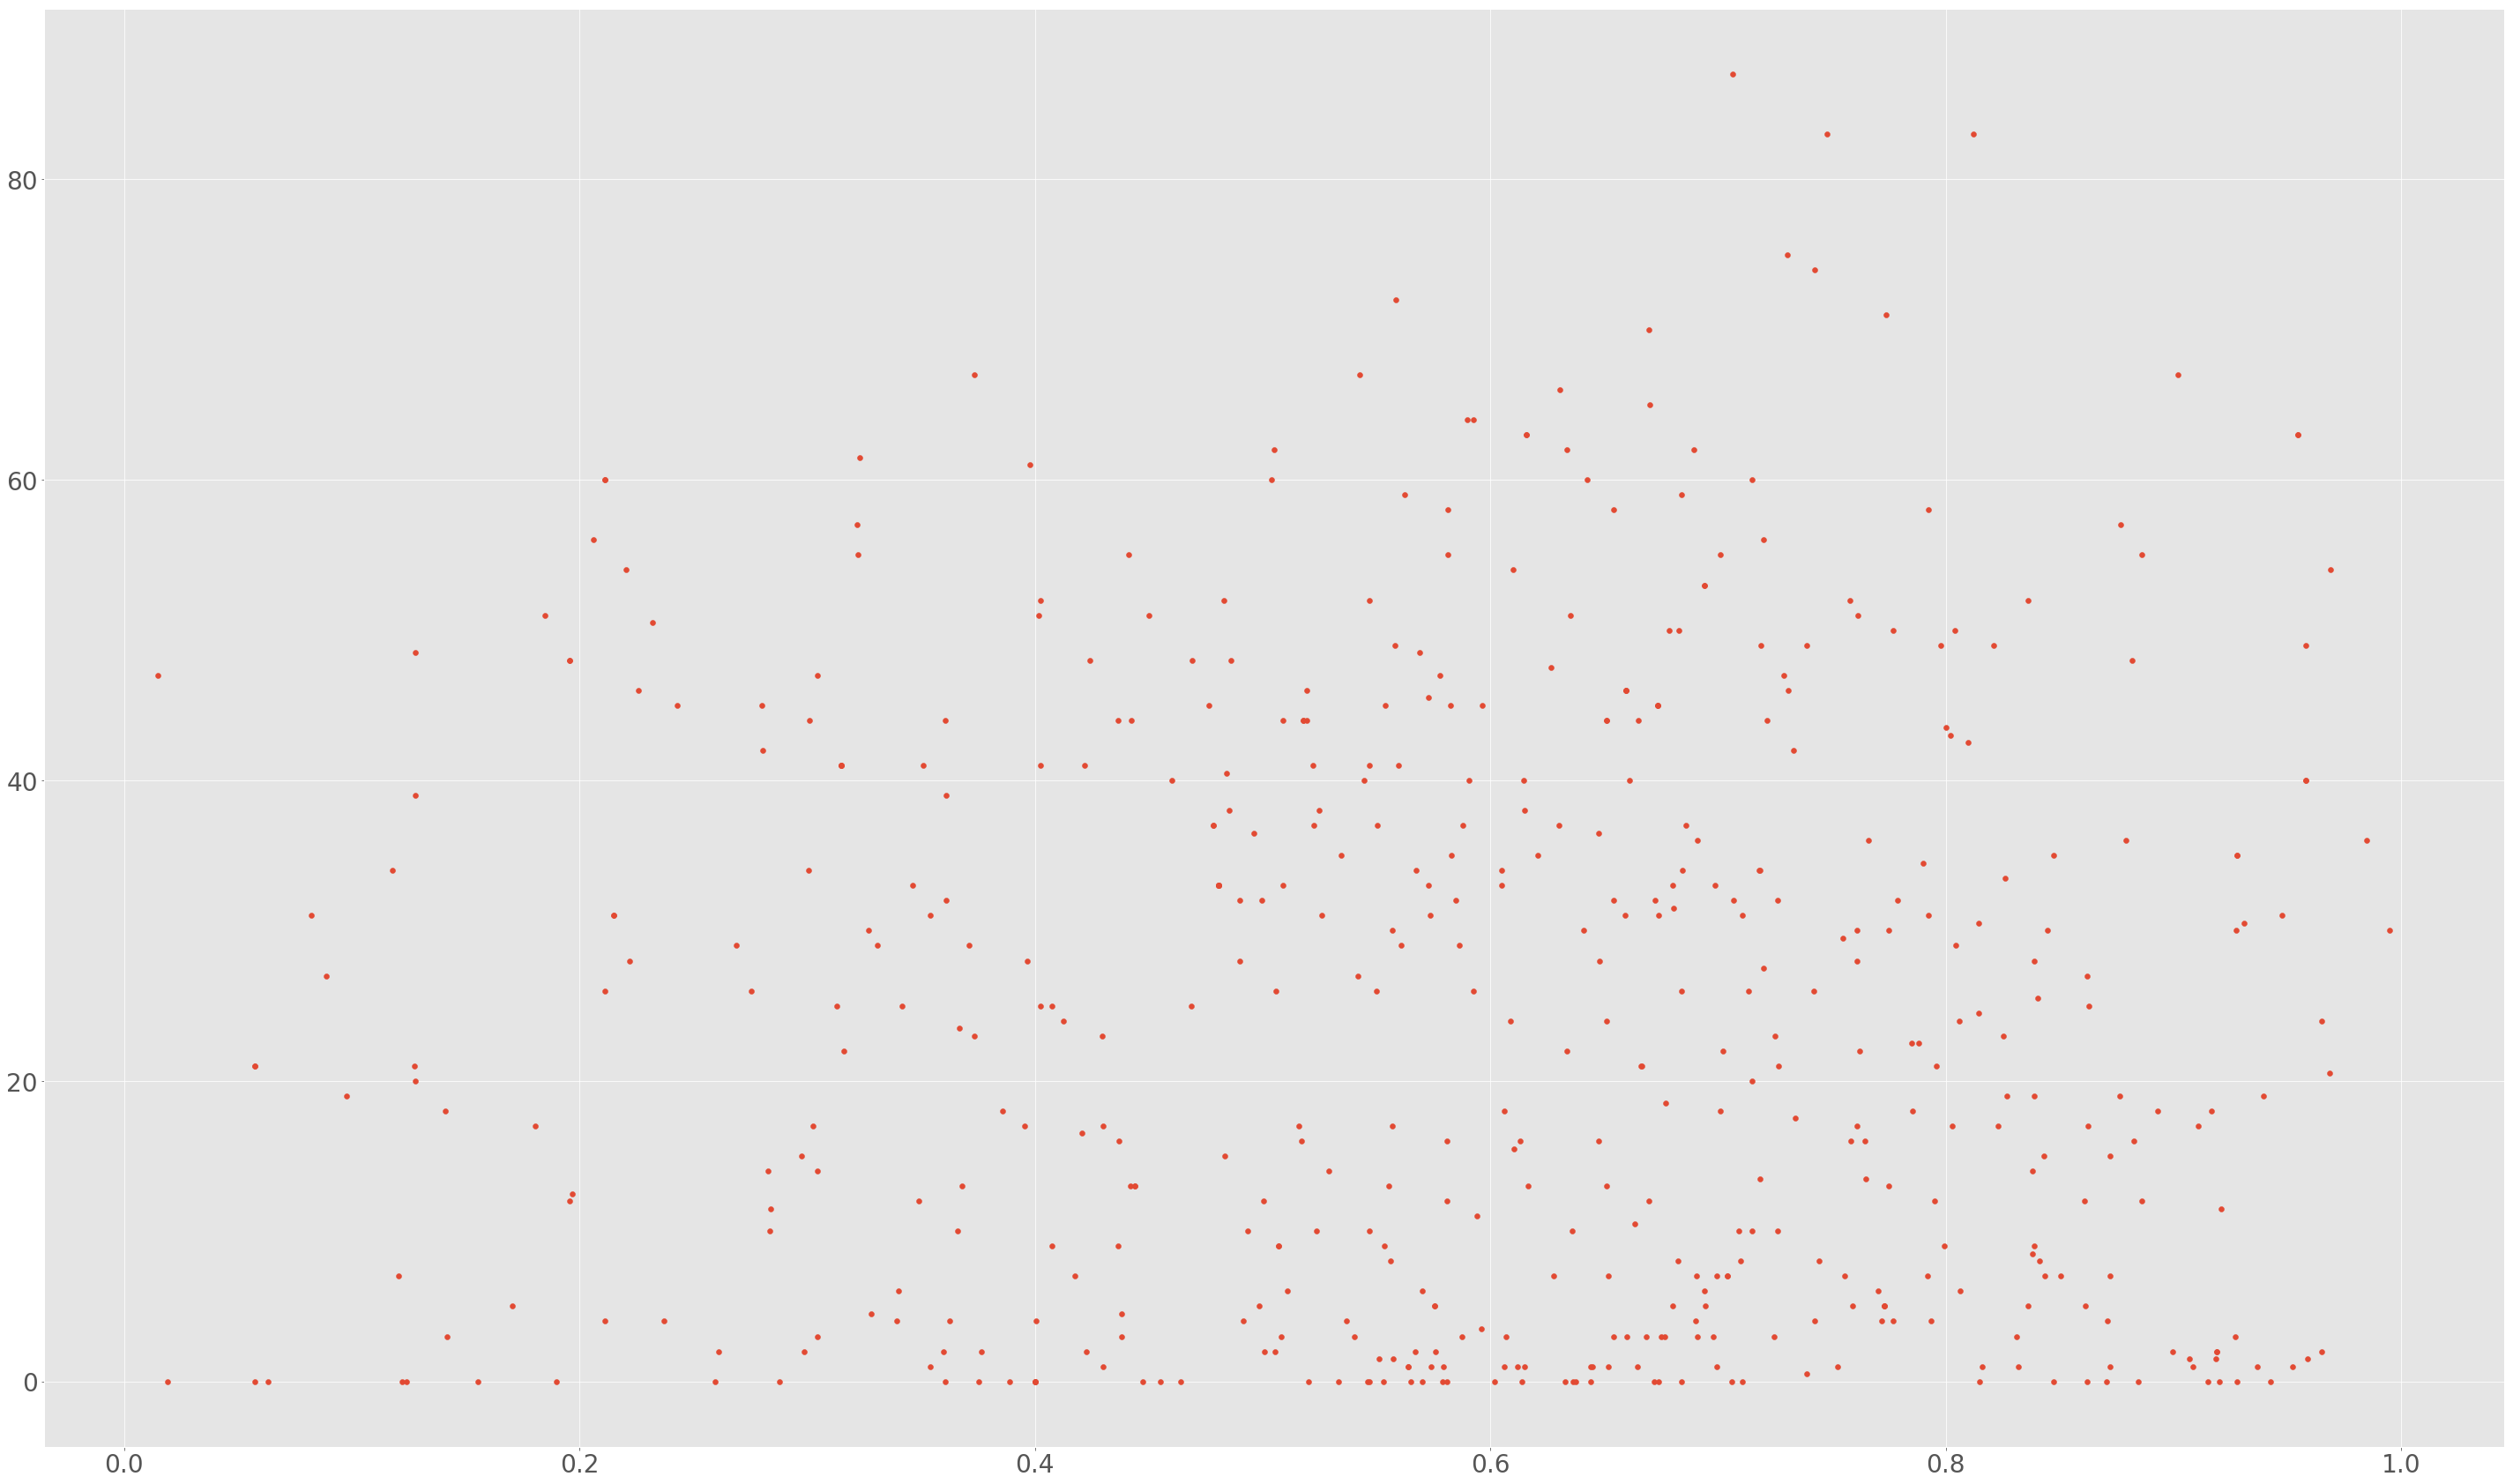

In [245]:
plt.scatter(list_of_tempo, list_of_dance)


plt.tick_params(labelsize=28)

## City Level

## Bourogh Level

## Gigs data